In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

In [9]:
a = pd.read_csv('../../datadata/train.csv', index_col='Id')
b = pd.read_csv('../../datadata/test.csv')

#Use this code to show all the 163 columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
a.loc[45:53]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
45,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,141000
46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456,Unf,0,1296,1752,GasA,Ex,Y,SBrkr,1752,0,0,1752,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,RFn,2,576,TA,TA,Y,196,82,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
47,50,RL,48.0,12822,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,1351,Unf,0,83,1434,GasA,Ex,Y,SBrkr,1518,631,0,2149,1,0,1,1,1,1,Gd,6,Typ,1,Ex,Attchd,2003.0,RFn,2,670,TA,TA,Y,168,43,0,0,198,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,239686
48,20,FV,84.0,11096,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1632,1656,GasA,Ex,Y,SBrkr,1656,0,0,1656,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2006.0,RFn,3,826,TA,TA,Y,0,146,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,249700
49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
50,20,RL,66.0,7742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,763,Unf,0,192,955,GasA,Ex,Y,SBrkr,955,0,0,955,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,386,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,127000
51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2,528,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,Gd,TA,Gd,LwQ,104,GLQ,712,0,816,GasA,TA,N,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,NaN,CarPort,1963.0,Unf,2,516,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000


In [3]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
a.shape

(1460, 81)

In [7]:
print('The shape of our training set: ',a.shape[0], 'houses', 'and', a.shape[1], 'features')
print('The shape of our testing set: ',b.shape[0], 'houses', 'and', b.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


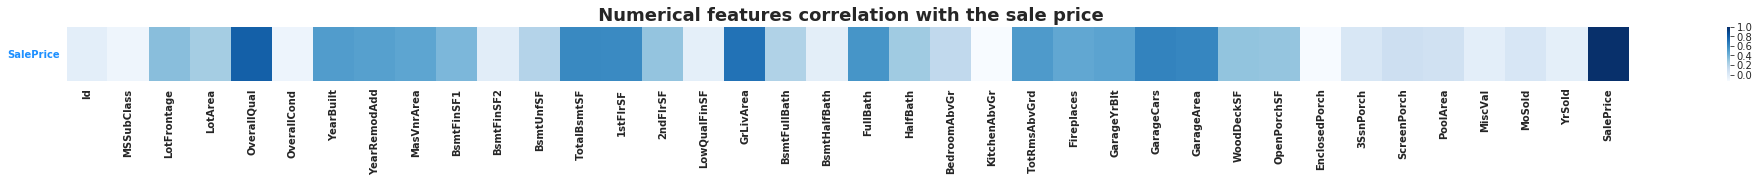

In [22]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(35,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold', rotation=90)
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [23]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(15).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


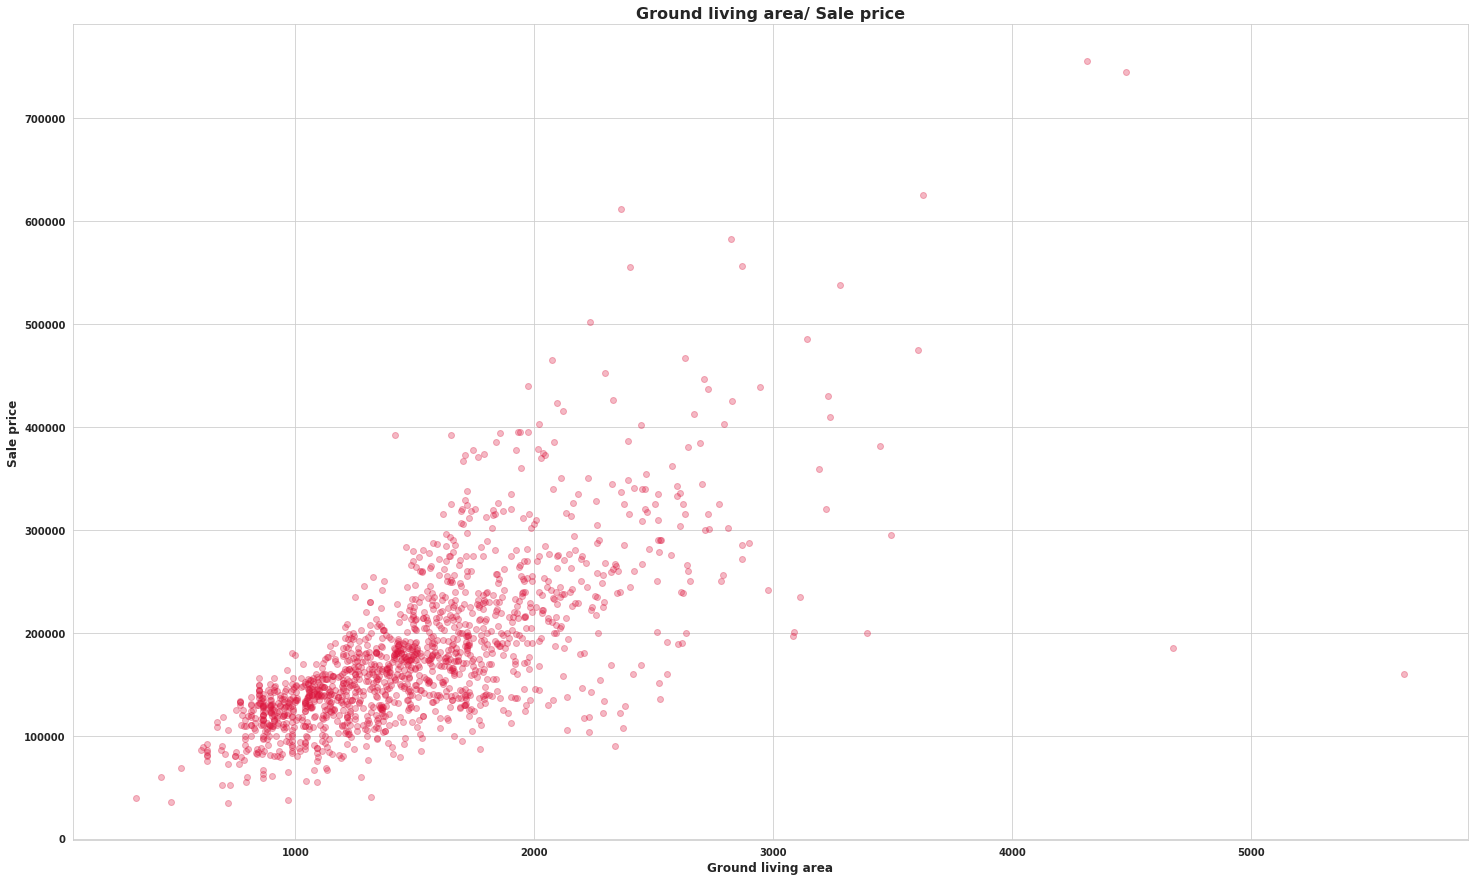

In [32]:
plt.figure(figsize=(25,15))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='crimson', alpha=0.3) # alpha регулирует прозрачность точек
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

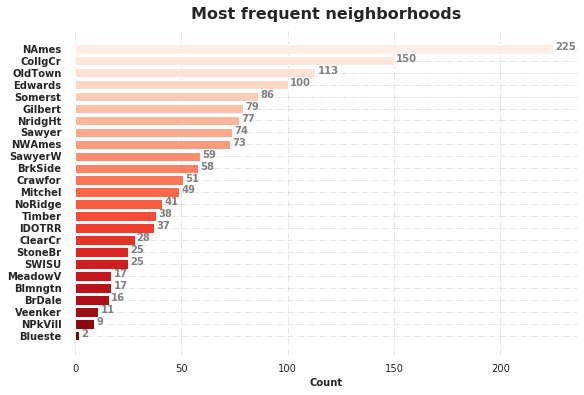

In [41]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()
# Show Plot
plt.show()

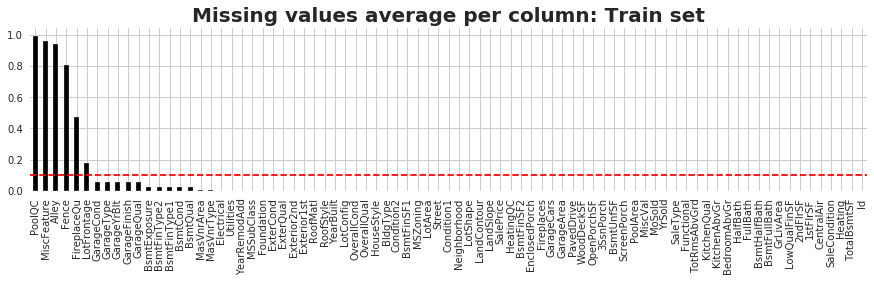

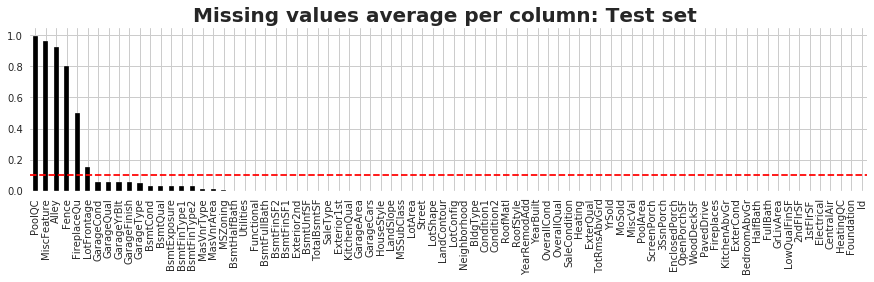

In [48]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))


a.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('Missing values average per column: Train set', fontsize=20, weight='bold' )
plt.show()

plt.subplots(1,0,figsize=(15,3))
b.isnull().mean().sort_values(ascending=False).plot.bar(color='black')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('Missing values average per column: Test set ', fontsize=20, weight='bold' )
plt.show()

In [49]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
#Combine train and test sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print("Total size is :",c1.shape)

Total size is : (2919, 79)


In [53]:
c1[:10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,

In [54]:
c=c1.dropna(thresh=len(c1)*0.9, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  6  features in the combined set


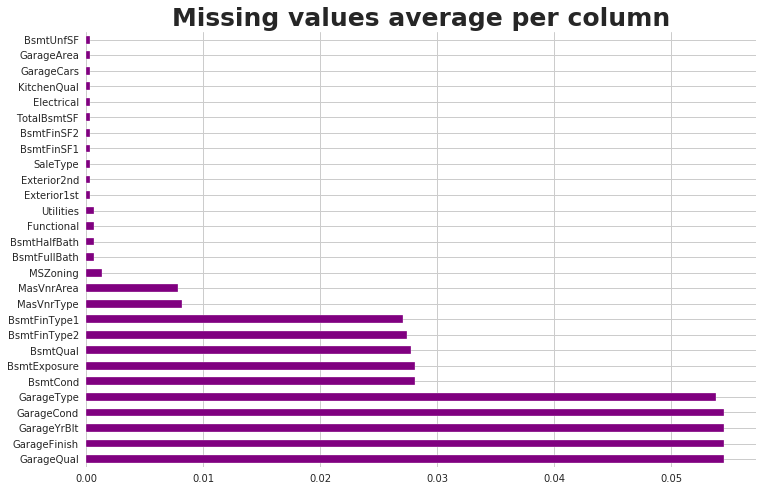

In [55]:


allna = (c.isnull().sum() / len(c))
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
allna.plot.barh(color='purple')
plt.title('Missing values average per column', fontsize=25, weight='bold' )
plt.show()



In [56]:
print('The shape of the combined dataset after dropping features with more than 90% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 90% M.V. (2919, 73)


In [57]:
NA=c[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt',
      'BsmtFinType2','BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 
      'MasVnrArea','MasVnrType','Electrical','MSZoning','BsmtFullBath',
      'BsmtHalfBath','Utilities','Functional','Exterior1st','BsmtUnfSF','Exterior2nd',
      'TotalBsmtSF','GarageArea','GarageCars','KitchenQual','BsmtFinSF2','BsmtFinSF1','SaleType']]

In [58]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 18 categorical features with missing values
We have : 10 numerical features with missing values


In [59]:
NAnum.head()

,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars,BsmtFinSF2,BsmtFinSF1
0,2003.0,196.0,1.0,0.0,150.0,856.0,548.0,2.0,0.0,706.0
1,1976.0,0.0,0.0,1.0,284.0,1262.0,460.0,2.0,0.0,978.0
2,2001.0,162.0,1.0,0.0,434.0,920.0,608.0,2.0,0.0,486.0
3,1998.0,0.0,1.0,0.0,540.0,756.0,642.0,3.0,0.0,216.0
4,2000.0,350.0,1.0,0.0,490.0,1145.0,836.0,3.0,0.0,655.0


In [60]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage


In [61]:


NAcat.head()



,GarageType,GarageFinish,GarageQual,GarageCond,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtExposure,MasVnrType,Electrical,MSZoning,Utilities,Functional,Exterior1st,Exterior2nd,KitchenQual,SaleType
0,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,No,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
1,Attchd,RFn,TA,TA,Unf,ALQ,TA,Gd,Gd,None,SBrkr,RL,AllPub,Typ,MetalSd,MetalSd,TA,WD
2,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Mn,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD
3,Detchd,Unf,TA,TA,Unf,ALQ,Gd,TA,No,None,SBrkr,RL,AllPub,Typ,Wd Sdng,Wd Shng,Gd,WD
4,Attchd,RFn,TA,TA,Unf,GLQ,TA,Gd,Av,BrkFace,SBrkr,RL,AllPub,Typ,VinylSd,VinylSd,Gd,WD


In [62]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,SaleType,Exterior2nd,Exterior1st,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageCond,GarageQual,GarageFinish
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [63]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')

In [64]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [65]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [66]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
TotalBsmtSF      0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [67]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] + c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd'] + c['YearBuilt'])/2

In [68]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1] - c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 76)
the shape of the encoded dataset (2919, 281)
We have  205 new encoded features


In [69]:
train = cb[:na]
test = cb[na:]

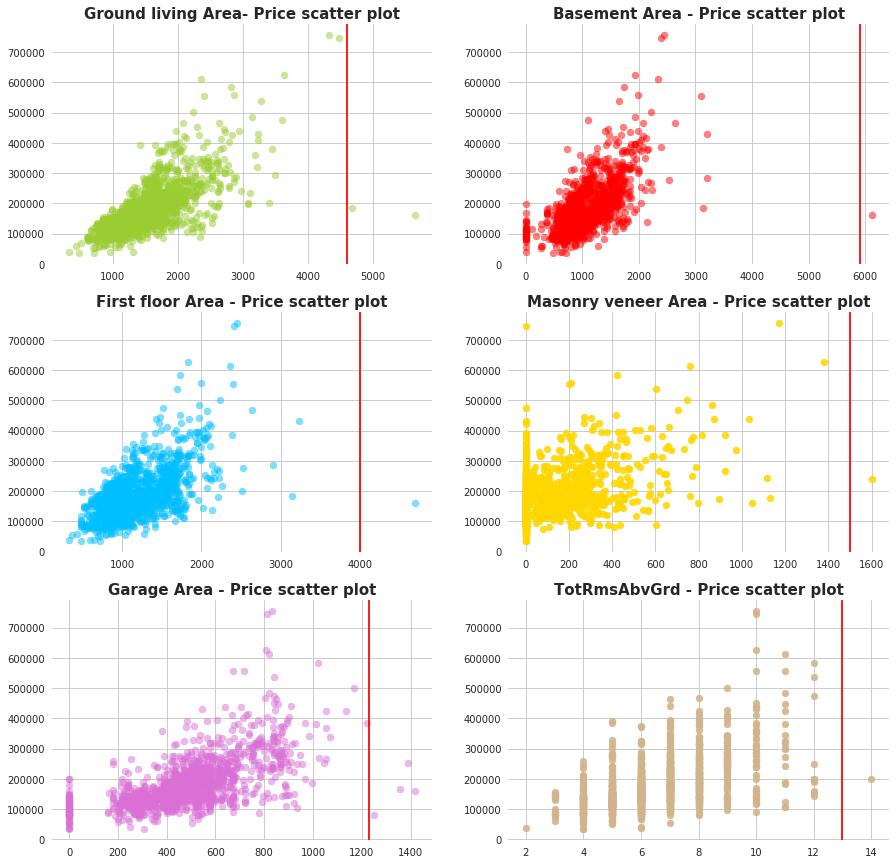

In [73]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' );

In [74]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [75]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [76]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [77]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [78]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [79]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [80]:
Train=train[(train['GrLivArea'] < 4600) & (train['MasVnrArea'] < 1500)]

print('We removed ',train.shape[0]- Train.shape[0],'outliers')

We removed  3 outliers


In [81]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [82]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [83]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

In [84]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',Train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


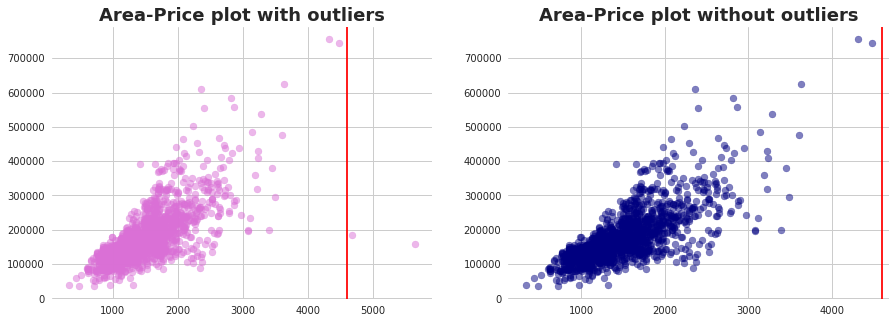

In [85]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=Train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show();

In [86]:


print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())



Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [87]:
from scipy.stats import skew

In [88]:
print("Skewness after log transform: ", Train['GrLivArea'].skew())
print("Kurtosis after log transform: ", Train['GrLivArea'].kurt())

Skewness after log transform:  1.0127645385480262
Kurtosis after log transform:  2.0672339304153655


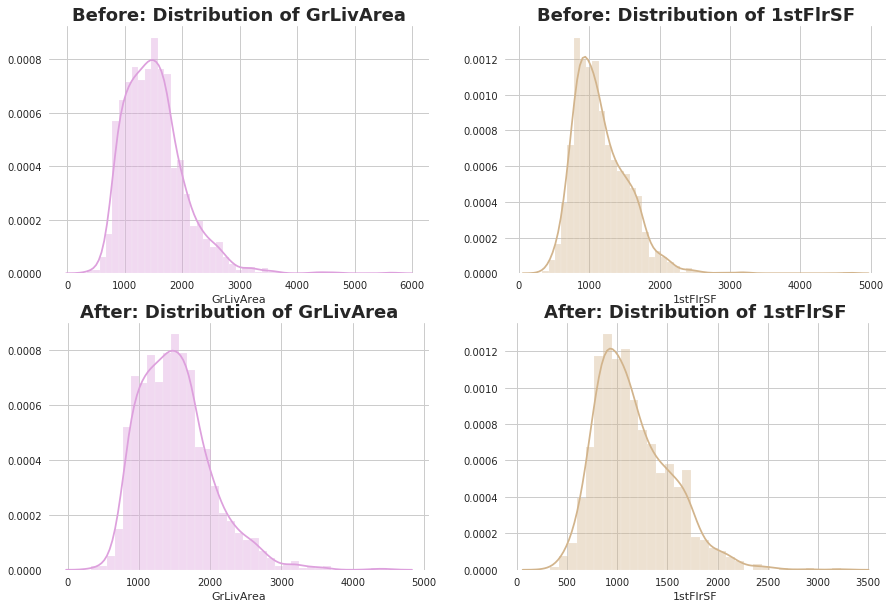

In [89]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(Train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(Train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

In [90]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [91]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

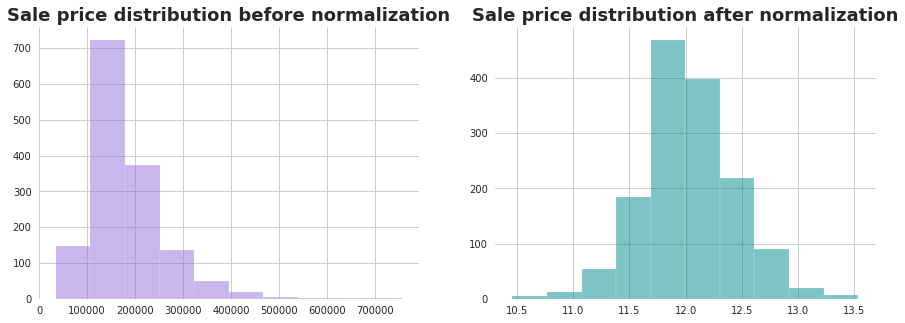

In [92]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [93]:


print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())



Skewness after log transform:  0.12299462625720967
Kurtosis after log transform:  0.8062416349541652


In [94]:
x=Train
y=np.array(target)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .1, random_state=0)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

In [30]:


print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())



Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [31]:


from scipy.stats import skew

numeric_feats = c.dtypes[c.dtypes != "object"].index

skewed_feats = c[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

c[skewed_feats] = np.log1p(c[skewed_feats])



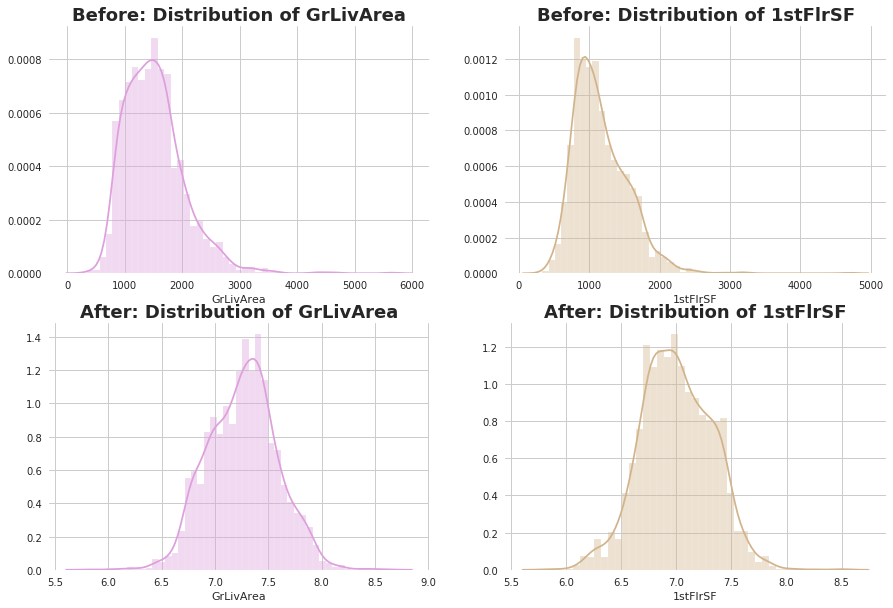

In [32]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(c.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(c['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

In [33]:
print("Skewness after log transform: ", c['GrLivArea'].skew())
print("Kurtosis after log transform: ", c['GrLivArea'].kurt())

Skewness after log transform:  0.013194362973261287
Kurtosis after log transform:  0.21187007351190523


In [34]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

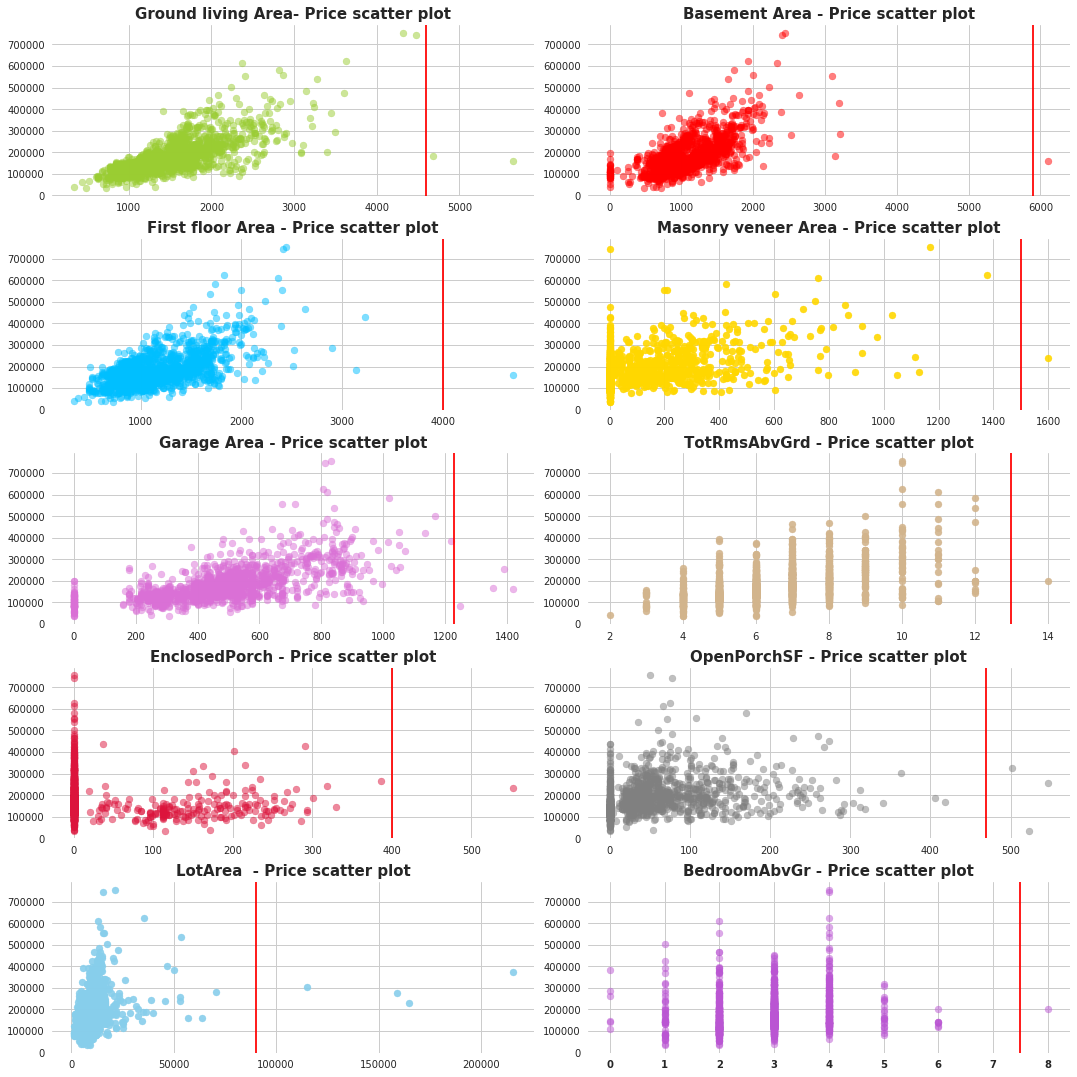

In [35]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((5,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(3,0))
plt.scatter(x=a['EnclosedPorch'], y=a['SalePrice'], color=('crimson'),alpha=0.5)
plt.axvline(x=400, color='r', linestyle='-')
plt.title('EnclosedPorch - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(3,1))
plt.scatter(x=a['OpenPorchSF'], y=a['SalePrice'], color=('gray'),alpha=0.5)
plt.axvline(x=470, color='r', linestyle='-')
plt.title('OpenPorchSF - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(4,0))
plt.scatter(x=a['LotArea'], y=a['SalePrice'], color=('skyblue'),alpha=0.9)
plt.axvline(x=90000, color='r', linestyle='-')
plt.title('LotArea  - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((5,2),(4,1))
plt.scatter(x=a['BedroomAbvGr'], y=a['SalePrice'], color=('mediumorchid'),alpha=0.5)
plt.axvline(x=7.5, color='r', linestyle='-')
plt.title('BedroomAbvGr - Price scatter plot', fontsize=15, weight='bold' )
plt.tight_layout(0.85)
plt.xticks(weight='bold')
plt.show()

In [36]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [37]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [38]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [39]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [40]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [41]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [42]:
a['EnclosedPorch'].sort_values(ascending=False).head(1)

197    552
Name: EnclosedPorch, dtype: int64

In [43]:
a['OpenPorchSF'].sort_values(ascending=False).head(3)

1328    547
495     523
583     502
Name: OpenPorchSF, dtype: int64

In [44]:
a['LotArea'].sort_values(ascending=False).head(4)

313    215245
335    164660
249    159000
706    115149
Name: LotArea, dtype: int64

In [45]:
a['BedroomAbvGr'].sort_values(ascending=False).head(1)

635    8
Name: BedroomAbvGr, dtype: int64

In [46]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


In [47]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [48]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [49]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

In [50]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


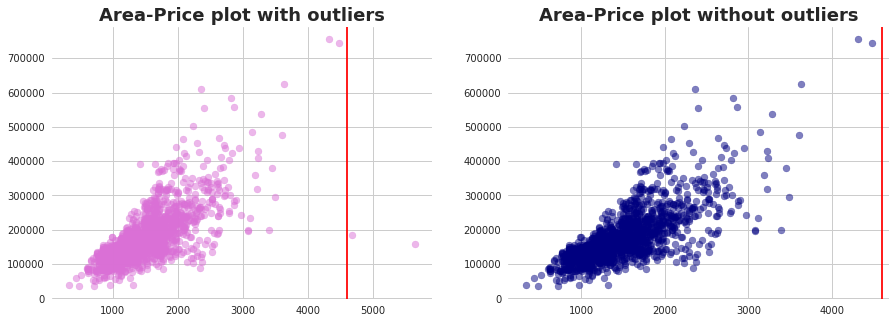

In [51]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

In [52]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [53]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

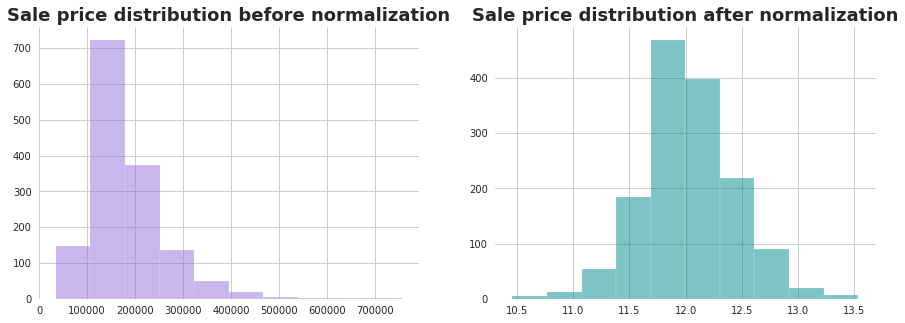

In [54]:


plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()



In [55]:
print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())

Skewness after log transform:  0.12299462625720967
Kurtosis after log transform:  0.8062416349541652


In [56]:
x=train
y=np.array(target)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=0)

In [97]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(test)

In [98]:


import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)



The best value of Alpha is:  {'alpha': 17}
The best score achieved with Alpha=11 is:  0.11499098170953842


In [101]:
ridge_mod=Ridge(alpha=17)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09556546950379977
Root Mean Square Error test = 0.11498479795724219


In [102]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [103]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10045366842935266
Root Mean Square Error test = 0.11201379259476703


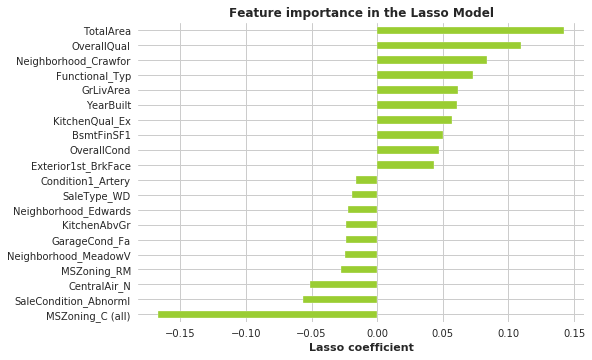

In [104]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [105]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  88 important features and dropped the other  193  features


In [106]:
from sklearn.linear_model import ElasticNetCV

In [107]:
alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.11358347357328742
0.000542555


In [108]:
from xgboost.sklearn import XGBRegressor

In [111]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod], 
                           use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

TypeError: __init__() missing 1 required positional argument: 'meta_regressor'

In [64]:


from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))



-1644680.4129491257
RMSE = 1282.4509397825423


In [65]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=14 is: ",math.sqrt(-ridge_reg.best_score_))

The best value of Alpha is:  {'alpha': 17}
The best score achieved with Alpha=14 is:  0.11499098170953842


In [66]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.09612456216897516
Root Mean Square Error test = 0.11498344553015065


In [67]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [68]:


lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))



Root Mean Square Error train = 0.10045366842935266
Root Mean Square Error test = 0.11201379259476703


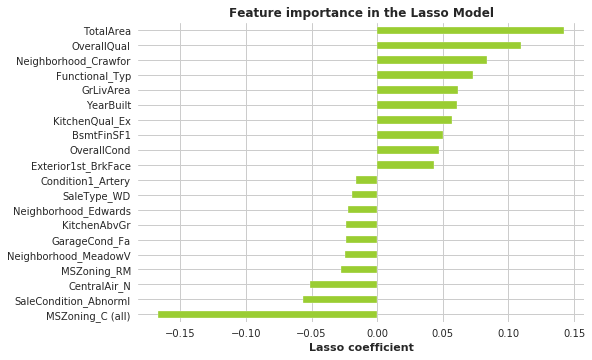

In [69]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [70]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  88 important features and dropped the other  193  features


In [71]:


from sklearn.linear_model import ElasticNetCV

#alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
#l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

#elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

#elasticmod = elastic_cv.fit(x_train, y_train.ravel())
#ela_pred=elasticmod.predict(x_test)
#print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
#print(elastic_cv.alpha_)



In [72]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.11358347357328742
0.000542555


In [76]:


from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[0,3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}
#
#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)



In [77]:


xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))



Root Mean Square Error test = 0.11492836547631496


In [78]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.10937672020639369


In [80]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.10960163542456924


In [81]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

In [83]:


#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission2.csv", index=False)
final_submission.head(10)



,Id,SalePrice
0,1461,119965.868342
1,1462,156582.026061
2,1463,182067.770691
3,1464,197849.825447
4,1465,186153.717147
5,1466,169969.448213
6,1467,178156.028556
7,1468,165528.826665
8,1469,190933.045998
9,1470,122806.908707
